Osnabrück University - Machine Learning (Summer Term 2016) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 06

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, May 29, 2016**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's studip folder.

## Assignment 1: Hebbian Learning (6 Points)

In the lecture (ML-07, Slides 10ff.) there is a simplified version of Ivan Pavlov's famous experiment on classical conditioning. In this exercise you will take a look into this simplified model and create your own conditionable dog with a simple Hebbian learning rule.

### a) Programming a Dog
To model the dog saliva behavior we will need to model an unconditioned and a conditioned stimulus: food and bell. They are represented as lists: `weight_food` and `weight_bell`. Note that one could just use a single number, the lists are only here to keep track of the history for a nice output. It is possible to access the current weight by selecting the last item of each list, respectively: `weight_food[-1]`.

A list of trials is already given as well as a condition database. Each entry represents an index to select from the `condition_db`. To figure out the value of the stimulus `food` in the second trial (which maps to condition `1`) one could do: `condition_db[1]["food"]`.

Your task is to implement a `for` loop over all trials. In each iteration select the correct values for $x_1$ and $x_2$ from the condition database and retrieve the current weights $w_1$ and $w_2$. Then calculate the response of the dog with the threshold $\theta$:

$$
r_t = \Theta(x_{1,t-1} w_{1,t-1} + x_{2,t-1} w_{2,t-1})\\
\Theta(x)= \begin{cases}1 \text{ if } x >= \theta\\0 \text{ else }\end{cases}
$$

With this response calculate both $w_{n,t}$ according to the Hebbian rule:

$$w_{n,t} = w_{n,t-1} + \epsilon \cdot r_t \cdot x_{n,t}$$

*Note: While you program the output might look a little messy, don't worry about it. Once you fill up all three lists properly, it will look much like on ML-07, Slide 14.*

In [1]:
%matplotlib notebook

import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

# Initialization
condition_db = [{"food": 1, "bell": 0}, 
                {"food": 0, "bell": 1},
                {"food": 1, "bell": 1}]

#trials = [0, 1, 2, 2, 1, 2, 1]
trials = [2,1]

epsilon = 0.2

#theta = 1/2
theta = 0.1

responses = []
weight_food = [1]
weight_bell = [0]
    
for t in trials:
    #get food and bell input from database
    f = condition_db[t]['food']        
    b = condition_db[t]['bell']

    #calculate the response
    responses.append(int((f*weight_food[-1] + b*weight_bell[-1]) > theta))
            
    #update weights
    weight_food.append(weight_food[-1]+epsilon*responses[-1]*f)
    weight_bell.append(weight_bell[-1]+epsilon*responses[-1]*b)

    
# Output
print("| Food   |   |" + "|   |".join(["{:3d}".format(condition_db[trial]["food"]) for trial in trials]) + "|   |")
print("| Bell   |   |" + "|   |".join(["{:3d}".format(condition_db[trial]["bell"]) for trial in trials]) + "|   |")
print("| Saliva |   |" + "|   |".join(["{:3d}".format(response) for response in responses]) + "|   |")
print("| w_Food |" + "|   |".join(["{:3.1f}".format(w) for w in weight_food]) + "|")
print("| w_Bell |" + "|   |".join(["{:3.1f}".format(w) for w in weight_bell]) + "|")

| Food   |   |  1|   |  0|   |
| Bell   |   |  1|   |  1|   |
| Saliva |   |  1|   |  1|   |
| w_Food |1.0|   |1.2|   |1.2|
| w_Bell |0.0|   |0.2|   |0.4|


### b) Parameter adjustment

In the above default setting of trials (`[0, 1, 2, 2, 1, 2, 1]`, in case you changed it), how many learning steps did you need until the dog started to produce saliva on the conditioned stimulus? What happens if you change the parameters $\epsilon$ and $\theta$? Try smaller and bigger values for each or present different conditions to the dog.

## Assignment 2: Local PCA (8 Points)

In the lecture we learned that regular PCA is ill suited for special cases of data. In this assignment we will take a look at local PCA which is used for clustered data (ML-06, Slide 25). This is mostly a repetition of algorithms we already used. Feel free to use the built-in functions for k-means clustering and PCA from the libraries (we already included the right imports to set you on track).

<IPython.core.display.Javascript object>


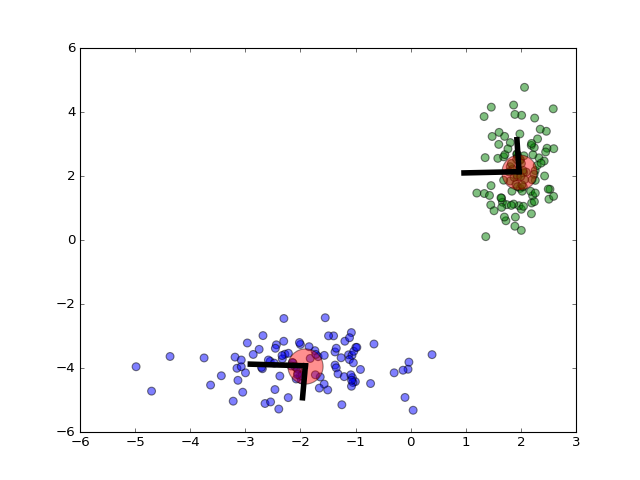

In [172]:
%matplotlib notebook

import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

from numpy.random import multivariate_normal as multNorm

from scipy.cluster.vq import kmeans, vq
from sklearn.decomposition.pca import PCA

ccodes = ['b','g','r','y','p']
num = 2

# Generate clustered data - you may plot the data to take a look at it
data = np.vstack((multNorm([2,2],[[0.1, 0], [0, 1]],100), multNorm([-2,-4],[[1, 0], [0, 0.3]],100)))

# TODO: Apply k-means to the data.
Kmeans  = kmeans(data,num)
centers = Kmeans[0]

#plot clusters
colors  = [ccodes[i] for i in vq(data,Kmeans[0])[0]]
plt.scatter(data[:,0],data[:,1],c=colors,s=50, alpha=0.5)

clusters = [data[memberships==i] for i in range(num)]
   
# TODO: Apply PCA for each cluster and store each two largest components.
pcas = [PCA(n_components=num).fit(c) for c in clusters]

# TODO: Plot the results of k-means and local PCA
for i,p in enumerate(pcas):
    for pc in p.components_:
        #plot cluster centers
        plt.scatter(centers[i][0],centers[i][1],s=1000,c='r',alpha=0.25)
        
        points = np.array([centers[i],centers[i]+pc])
        
        #plot principal components
        plt.plot(points[:,0],points[:,1], 'k-', lw= 5)
      






## Assignment 3: Data Visualization and Chernoff Faces (6 Points)

The following exercise contains no programming (unless you want to go through the implementation). Answer the questions that are posted below the code segment (and run the code before - it's really worth it!). In case you are even more interested - here is a link to the [original paper](http://www.dtic.mil/cgi-bin/GetTRDoc?AD=AD0738473).

<IPython.core.display.Javascript object>


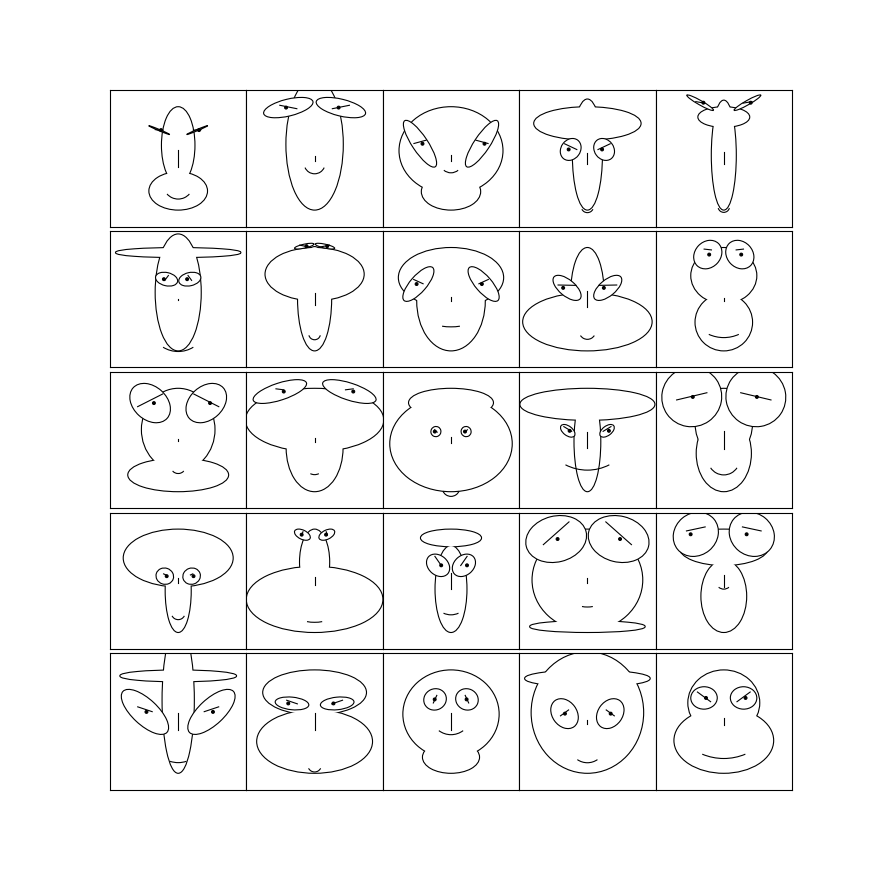

In [139]:
%matplotlib notebook

from pylab import *

def cface(ax, x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18):
    '''
    This implementation of chernov faces is taken from Abraham Flaxman. You can
    find the original source files here: https://gist.github.com/aflaxman/4043086
    Only minor adjustments have been made.
    
     x1 = height  of upper face
     x2 = overlap of lower face
     x3 = half of vertical size of face
     x4 = width of upper face
     x5 = width of lower face
     x6 = length of nose
     x7 = vertical position of mouth
     x8 = curvature of mouth
     x9 = width of mouth
     x10 = vertical position of eyes
     x11 = separation of eyes
     x12 = slant of eyes
     x13 = eccentricity of eyes
     x14 = size of eyes
     x15 = position of pupils
     x16 = vertical position of eyebrows
     x17 = slant of eyebrows
     x18 = size of eyebrows
    '''
    
    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9*(x3-.5)
    x4 = (x4+.25)
    x5 = (x5+.2)
    x6 = .3*(x6+.01)
    x8 = 5*(x8+.001)
    x11 /= 5
    x12 = 2*(x12-.5)
    x13 += .05
    x14 += .1
    x15 = .5*(x15-.5)
    x16 = .25*x16
    x17 = .5*(x17-.5)
    x18 = .5*(x18+.1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = mpl.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', linewidth=2)
    ax.add_artist(e)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = mpl.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', linewidth=2)
    ax.add_artist(e)

    # cover overlaps
    e = mpl.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', ec='none')
    ax.add_artist(e)
    e = mpl.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', ec='none')
    ax.add_artist(e)
    
    # draw nose
    plot([0,0], [-x6/2, x6/2], 'k')
    
    # draw mouth
    p = mpl.patches.Arc( (0,-x7+.5/x8), 1/x8, 1/x8, theta1=270-180/pi*arctan(x8*x9), theta2=270+180/pi*arctan(x8*x9))
    ax.add_artist(p)
    
    # draw eyes
    p = mpl.patches.Ellipse( (-x11-x14/2,x10), x14, x13*x14, angle=-180/pi*x12, facecolor='white')
    ax.add_artist(p)
    
    p = mpl.patches.Ellipse( (x11+x14/2,x10), x14, x13*x14, angle=180/pi*x12, facecolor='white')
    ax.add_artist(p)

    # draw pupils
    p = mpl.patches.Ellipse( (-x11-x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = mpl.patches.Ellipse( (x11+x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    
    # draw eyebrows
    plot([-x11-x14/2-x14*x18/2,-x11-x14/2+x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')
    plot([x11+x14/2+x14*x18/2,x11+x14/2-x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')

fig = figure('Chernov Faces', figsize=(11,11))
for i in range(25):
    ax = fig.add_subplot(5, 5, i+1, aspect='equal')
    cface(ax, .9, *rand(17))
    ax.axis([-1.2,1.2,-1.2,1.2])
    ax.set_xticks([])
    ax.set_yticks([])

fig.subplots_adjust(hspace=0, wspace=0)
fig.canvas.draw()

### a) Data Visualization Techniques

Why do we need data visualization techniques and what are techniques to visualize high dimensional data?

### b) Chernoff faces

Why did Chernoff use faces for his representation? Why not something else, like dogs or houses?

### c) Alternatives

Explain at least one other data visualization technique from the lecture.